# Submission for Grasshopper test - Chia Jia Yuan

## Data Preprocessing

Import required libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the dataset

In [19]:
# Read the raw
dataset = pd.read_csv('intern_task.csv', quoting = 3)

Inspect data

In [4]:
print(list(dataset))
print(dataset.head())
print(dataset.describe())
print(dataset.shape[0])

['timestamp', 'bid_price', 'bid_qty', 'ask_price', 'ask_qty', 'trade_price', 'sum_trade_1s', 'bid_advance_time', 'ask_advance_time', 'last_trade_time', '_1s_side', '_3s_side', '_5s_side']
                          timestamp  bid_price  bid_qty  ask_price  ask_qty  \
0  2018-01-31 23:45:11.445630+00:00    23270.0    110.0    23280.0     68.0   
1  2018-01-31 23:45:11.446141+00:00    23270.0     10.0    23280.0     68.0   
2  2018-01-31 23:45:11.446206+00:00    23270.0      8.0    23280.0     68.0   
3  2018-01-31 23:45:11.446253+00:00    23270.0      3.0    23280.0     70.0   
4  2018-01-31 23:45:11.446279+00:00    23270.0      1.0    23280.0     70.0   

   trade_price  sum_trade_1s  bid_advance_time  ask_advance_time  \
0      23270.0         106.0          9.491206          7.492440   
1      23270.0         107.0          9.491717          7.492951   
2      23270.0         107.0          9.491782          7.493016   
3      23270.0         107.0          9.491829          7.493063 

Check null values

In [4]:
dataset.isnull().values.any()

True

In [5]:
dataset.isnull().sum()

timestamp               0
bid_price               0
bid_qty                 0
ask_price               0
ask_qty                 0
trade_price             0
sum_trade_1s        65975
bid_advance_time        0
ask_advance_time        0
last_trade_time      9591
_1s_side                0
_3s_side                0
_5s_side                0
dtype: int64

In [6]:
print(dataset[dataset['sum_trade_1s'].isnull().values].head())

                           timestamp  bid_price  bid_qty  ask_price  ask_qty  \
56  2018-01-31 23:45:12.548528+00:00    23270.0     16.0    23280.0     87.0   
57  2018-01-31 23:45:12.585329+00:00    23270.0     15.0    23280.0     87.0   
58  2018-01-31 23:45:12.585636+00:00    23270.0     15.0    23280.0     93.0   
59  2018-01-31 23:45:12.585686+00:00    23270.0     15.0    23280.0     94.0   
60  2018-01-31 23:45:12.656053+00:00    23270.0     15.0    23280.0     95.0   

    trade_price  sum_trade_1s  bid_advance_time  ask_advance_time  \
56      23270.0           NaN          0.902111          1.100741   
57      23270.0           NaN          0.938912          1.137542   
58      23270.0           NaN          0.939219          1.137849   
59      23270.0           NaN          0.939269          1.137899   
60      23270.0           NaN          1.009636          1.208266   

    last_trade_time  _1s_side  _3s_side  _5s_side  
56         1.002324         0         0         0  


In [7]:
print(dataset[dataset['sum_trade_1s'].isnull().values]['last_trade_time'].min())

1.000017


For the null values in sum_trade_1s, it can be found out that for all cases of NULL in sum_trade_1s, the last trade time is always larger than 1s. Other than that, the min value recorded in that column is 1. From that, it can be safely assume that all NULL in sum_trade_1s actually represents "0 trade done in last 1 second", and can be substitute with 0.

In [5]:
dataset["sum_trade_1s"].fillna(0, inplace = True)
dataset.isnull().sum()

timestamp              0
bid_price              0
bid_qty                0
ask_price              0
ask_qty                0
trade_price            0
sum_trade_1s           0
bid_advance_time       0
ask_advance_time       0
last_trade_time     9591
_1s_side               0
_3s_side               0
_5s_side               0
dtype: int64

For the last_trade_time null values, as the min of the data is 0 (implies 0 can be captured properly), and the total of null values in last_trade_time is qutie a small number relative to the total number of data, hence those null data will be remove from dataset

In [6]:
dataset = dataset.dropna(subset=['last_trade_time'])
print(dataset.shape[0])
dataset.isnull().values.any()

122603


False

Process the timestamp string into a normalized value using pandas.to_datetime which will convert the string to pandas.Timestamp objects which can be represented with nanoseconds since epoch.

In [7]:
dataset.insert(1, 'datetime', pd.to_datetime(dataset["timestamp"]))
print(list(dataset))
print(dataset['datetime'].head())
print(dataset['datetime'][0].value)

['timestamp', 'datetime', 'bid_price', 'bid_qty', 'ask_price', 'ask_qty', 'trade_price', 'sum_trade_1s', 'bid_advance_time', 'ask_advance_time', 'last_trade_time', '_1s_side', '_3s_side', '_5s_side']
0   2018-01-31 23:45:11.445630
1   2018-01-31 23:45:11.446141
2   2018-01-31 23:45:11.446206
3   2018-01-31 23:45:11.446253
4   2018-01-31 23:45:11.446279
Name: datetime, dtype: datetime64[ns]
1517442311445630000


Convert the Timestamp objects into microseconds and save them into a column in the dataset

In [8]:
microseconds = []
for index, row in dataset.iterrows():
    microseconds.append(row['datetime'].value / 1000)
dataset.insert(2, 'microseconds', microseconds)
print(list(dataset))
print(dataset['datetime'][0].value)

['timestamp', 'datetime', 'microseconds', 'bid_price', 'bid_qty', 'ask_price', 'ask_qty', 'trade_price', 'sum_trade_1s', 'bid_advance_time', 'ask_advance_time', 'last_trade_time', '_1s_side', '_3s_side', '_5s_side']
1517442311445630000


Add price spread (ask price - bid price)

In [9]:
dataset.insert(7, 'spread', dataset["ask_price"] - dataset["bid_price"])
print(list(dataset))
print(dataset['datetime'][0].value)

['timestamp', 'datetime', 'microseconds', 'bid_price', 'bid_qty', 'ask_price', 'ask_qty', 'spread', 'trade_price', 'sum_trade_1s', 'bid_advance_time', 'ask_advance_time', 'last_trade_time', '_1s_side', '_3s_side', '_5s_side']
1517442311445630000


Visualize the ask price, bid price and trade price over time

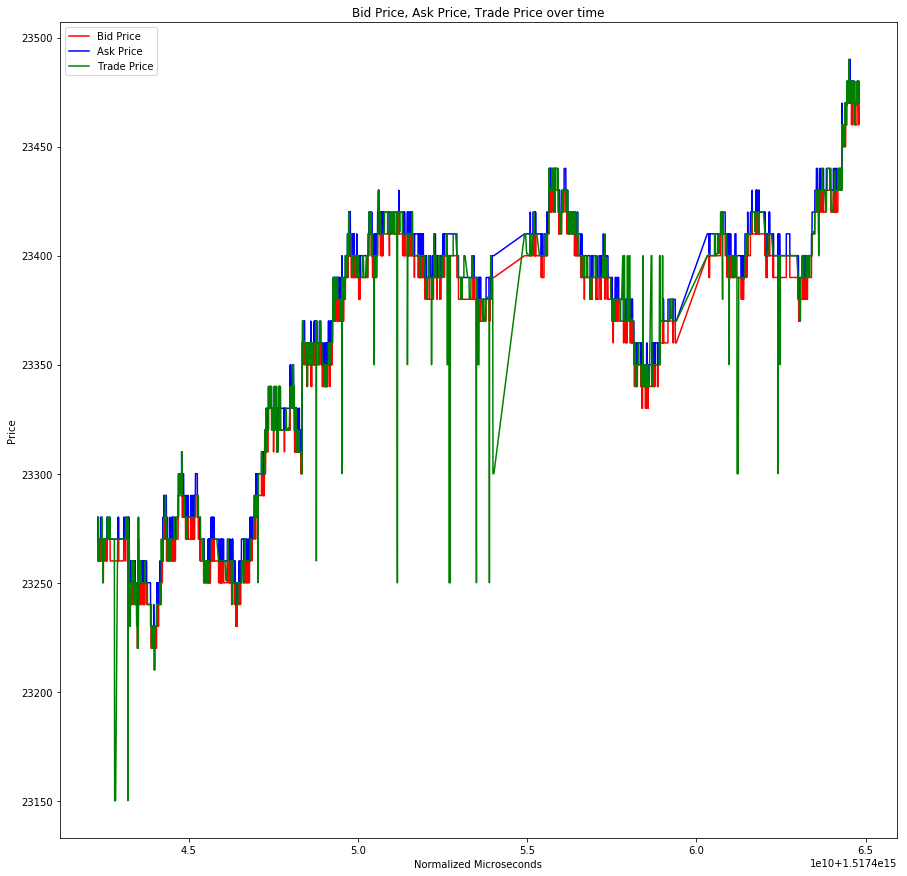

In [13]:
plt.figure(figsize=(15, 15))
plt.plot(dataset["microseconds"].values, dataset["bid_price"].values, color = 'red', label = 'Bid Price')
plt.plot(dataset["microseconds"].values, dataset["ask_price"].values, color = 'blue', label = 'Ask Price')
plt.plot(dataset["microseconds"].values, dataset["trade_price"].values, color = 'green', label = 'Trade Price')
plt.title('Bid Price, Ask Price, Trade Price over time')
plt.xlabel('Normalized Microseconds')
plt.ylabel('Price')
plt.legend()
plt.show()

Visualize the ask quantity, bid quantity, sum trade in last second over time

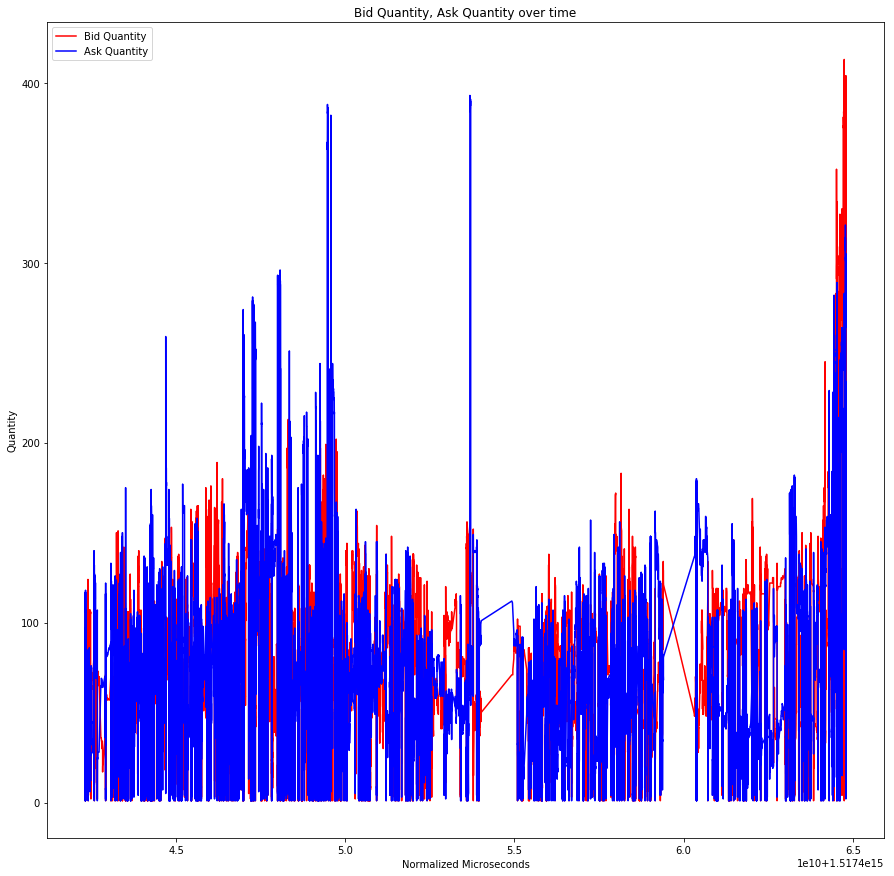

In [14]:
plt.figure(figsize=(15, 15))
plt.plot(dataset["microseconds"].values, dataset["bid_qty"].values, color = 'red', label = 'Bid Quantity')
plt.plot(dataset["microseconds"].values, dataset["ask_qty"].values, color = 'blue', label = 'Ask Quantity')
plt.title('Bid Quantity, Ask Quantity over time')
plt.xlabel('Normalized Microseconds')
plt.ylabel('Quantity')
plt.legend()
plt.show()

Check the feature correlation

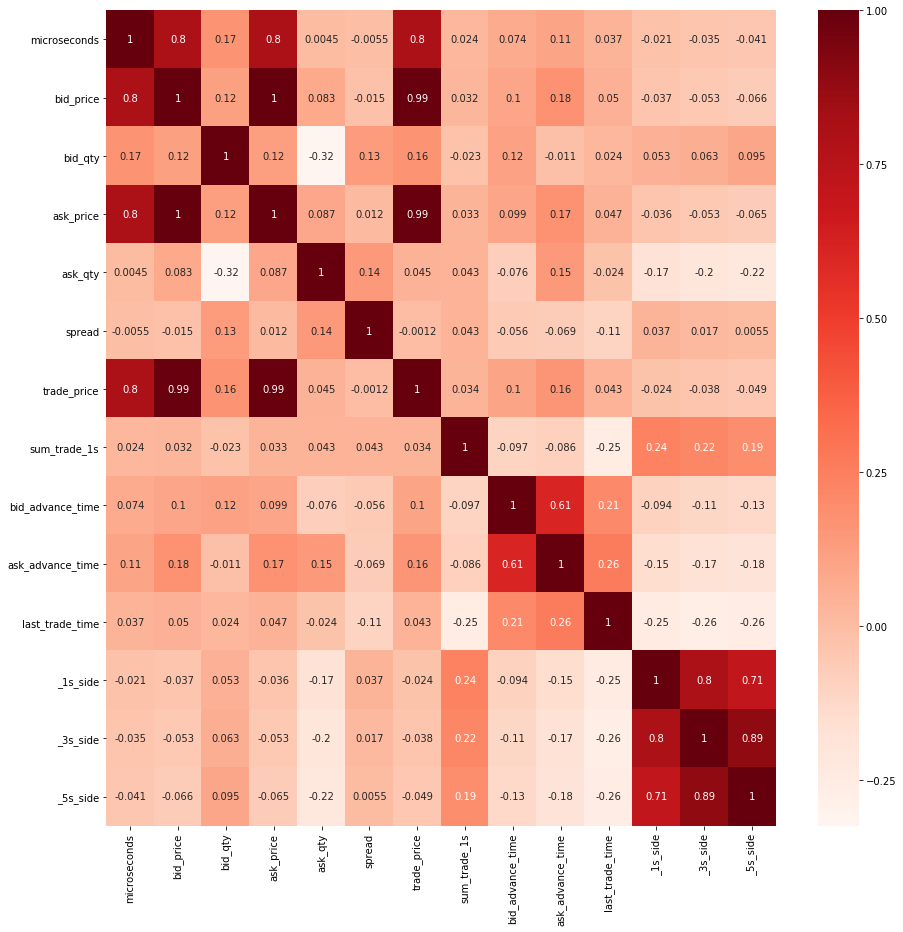

In [15]:
plt.figure(figsize=(15, 15))
cor = dataset.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Training preparation

Construct the features X and labels Y. 

X includes microseconds, bid_price, bid_qty, ask_price, ask_qty, spread, trade_price, sum_trade_1s, bid_advance_time, ask_advance_time, last_trade_time.

Y includes _1s_side, _3s_side, _5s_side

In [10]:
X = dataset.iloc[:, 2:-3].values
y = dataset.iloc[:, -3:].values

Split the data into training, validation and testing datasets. 80% training dataset, 10% validation dataset, 10% testing dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)

As X consist of vastly different values, scaling is required for X

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
X_test = sc_X.transform(X_test)

## Model training and evaluation

### Logistic Regression Classifier 

As Logistic Regression is not inherently multi-output, we will split the 1 second, 3 second and 5 second event prediction into 3 different classifiers to train and evaluate.

We will first test the One-Vs-Rest option

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [19]:
# Training the Logistic Regression model
logistic1s = LogisticRegression(random_state = 0, multi_class = 'ovr')
logistic1s.fit(X_train, y_train[:,0])

logistic3s = LogisticRegression(random_state = 0, multi_class = 'ovr')
logistic3s.fit(X_train, y_train[:,1])

logistic5s = LogisticRegression(random_state = 0, multi_class = 'ovr')
logistic5s.fit(X_train, y_train[:,2])

# Predict the training dataset so that we can compare against validation dataset results
# To see if there is any overfitting
y_pred_train_1s = logistic1s.predict(X_train)
y_pred_train_3s = logistic3s.predict(X_train)
y_pred_train_5s = logistic5s.predict(X_train)

y_pred_1s = logistic1s.predict(X_val)
y_pred_3s = logistic3s.predict(X_val)
y_pred_5s = logistic5s.predict(X_val)

# Display results
accuracy_1s = accuracy_score(y_train[:,0], y_pred_train_1s)
f1_1s = f1_score(y_train[:,0], y_pred_train_1s, average='weighted')
print("Logistic Regression OVR (Training): 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_train[:,1], y_pred_train_3s)
f1_3s = f1_score(y_train[:,1], y_pred_train_3s, average='weighted')
print("Logistic Regression OVR (Training): 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_train[:,2], y_pred_train_5s)
f1_5s = f1_score(y_train[:,2], y_pred_train_5s, average='weighted')
print("Logistic Regression OVR (Training): 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

accuracy_1s = accuracy_score(y_val[:,0], y_pred_1s)
f1_1s = f1_score(y_val[:,0], y_pred_1s, average='weighted')
print("Logistic Regression OVR: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_val[:,1], y_pred_3s)
f1_3s = f1_score(y_val[:,1], y_pred_3s, average='weighted')
print("Logistic Regression OVR: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_val[:,2], y_pred_5s)
f1_5s = f1_score(y_val[:,2], y_pred_5s, average='weighted')
print("Logistic Regression OVR: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

Logistic Regression OVR (Training): 1s prediction: acc= 0.777558480268259 , f1= 0.7035238947626498
Logistic Regression OVR (Training): 3s prediction: acc= 0.733795200741136 , f1= 0.7048611788718326
Logistic Regression OVR (Training): 5s prediction: acc= 0.7160925211717201 , f1= 0.7040979561465449
Logistic Regression OVR: 1s prediction: acc= 0.7777979157227005 , f1= 0.702913035924718
Logistic Regression OVR: 3s prediction: acc= 0.7323969188944268 , f1= 0.7030457462133896
Logistic Regression OVR: 5s prediction: acc= 0.7178069777979157 , f1= 0.7060502291688441


We now test the multinomial option

In [20]:
logistic1s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial')
logistic1s.fit(X_train, y_train[:,0])

logistic3s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial')
logistic3s.fit(X_train, y_train[:,1])

logistic5s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial')
logistic5s.fit(X_train, y_train[:,2])

y_pred_train_1s = logistic1s.predict(X_train)
y_pred_train_3s = logistic3s.predict(X_train)
y_pred_train_5s = logistic5s.predict(X_train)

y_pred_1s = logistic1s.predict(X_val)
y_pred_3s = logistic3s.predict(X_val)
y_pred_5s = logistic5s.predict(X_val)

accuracy_1s = accuracy_score(y_train[:,0], y_pred_train_1s)
f1_1s = f1_score(y_train[:,0], y_pred_train_1s, average='weighted')
print("Logistic Regression Multinomial (Training): 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_train[:,1], y_pred_train_3s)
f1_3s = f1_score(y_train[:,1], y_pred_train_3s, average='weighted')
print("Logistic Regression Multinomial (Training): 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_train[:,2], y_pred_train_5s)
f1_5s = f1_score(y_train[:,2], y_pred_train_5s, average='weighted')
print("Logistic Regression Multinomial (Training): 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

accuracy_1s = accuracy_score(y_val[:,0], y_pred_1s)
f1_1s = f1_score(y_val[:,0], y_pred_1s, average='weighted')
print("Logistic Regression Multinomial: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_val[:,1], y_pred_3s)
f1_3s = f1_score(y_val[:,1], y_pred_3s, average='weighted')
print("Logistic Regression Multinomial: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_val[:,2], y_pred_5s)
f1_5s = f1_score(y_val[:,2], y_pred_5s, average='weighted')
print("Logistic Regression Multinomial: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

Logistic Regression Multinomial (Training): 1s prediction: acc= 0.7850705388341205 , f1= 0.742937186652454
Logistic Regression Multinomial (Training): 3s prediction: acc= 0.7426868196602455 , f1= 0.7279690875355949
Logistic Regression Multinomial (Training): 5s prediction: acc= 0.7165758707845369 , f1= 0.7085453442594375
Logistic Regression Multinomial: 1s prediction: acc= 0.7864068871771636 , f1= 0.7431059555272412
Logistic Regression Multinomial: 3s prediction: acc= 0.7436338921613049 , f1= 0.728538147341308
Logistic Regression Multinomial: 5s prediction: acc= 0.7179882193022202 , f1= 0.7104111314312003


Find the best regularization

In [21]:
C_param_range = [0.001,0.01,0.1,1,10,100]
Accuracy = []
for i in C_param_range:
    
    logistic1s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', C = i)
    logistic1s.fit(X_train, y_train[:,0])

    logistic3s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', C = i)
    logistic3s.fit(X_train, y_train[:,1])

    logistic5s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', C = i)
    logistic5s.fit(X_train, y_train[:,2])
    
    y_pred_train_1s = logistic1s.predict(X_train)
    y_pred_train_3s = logistic3s.predict(X_train)
    y_pred_train_5s = logistic5s.predict(X_train)

    y_pred_1s = logistic1s.predict(X_val)
    y_pred_3s = logistic3s.predict(X_val)
    y_pred_5s = logistic5s.predict(X_val)
    
    accuracy_1s = accuracy_score(y_train[:,0], y_pred_train_1s)
    f1_1s = f1_score(y_train[:,0], y_pred_train_1s, average='weighted')
    print("Logistic Regression Multinomial (Training): 1s prediction: C=", i, ", acc=", accuracy_1s, ", f1=", f1_1s)

    accuracy_3s = accuracy_score(y_train[:,1], y_pred_train_3s)
    f1_3s = f1_score(y_train[:,1], y_pred_train_3s, average='weighted')
    print("Logistic Regression Multinomial (Training): 3s prediction: C=", i, ", acc=", accuracy_3s, ", f1=", f1_3s)

    accuracy_5s = accuracy_score(y_train[:,2], y_pred_train_5s)
    f1_5s = f1_score(y_train[:,2], y_pred_train_5s, average='weighted')
    print("Logistic Regression Multinomial (Training): 5s prediction: C=", i, ", acc=", accuracy_5s, ", f1=", f1_5s)

    accuracy_1s = accuracy_score(y_val[:,0], y_pred_1s)
    f1_1s = f1_score(y_val[:,0], y_pred_1s, average='weighted')
    print("Logistic Regression Multinomial: 1s prediction: C=", i, ", acc=", accuracy_1s, ", f1=", f1_1s)
    
    accuracy_3s = accuracy_score(y_val[:,1], y_pred_3s)
    f1_3s = f1_score(y_val[:,1], y_pred_3s, average='weighted')
    print("Logistic Regression Multinomial: 3s prediction: C=", i, ", acc=", accuracy_3s, ", f1=", f1_3s)
    
    accuracy_5s = accuracy_score(y_val[:,2], y_pred_5s)
    f1_5s = f1_score(y_val[:,2], y_pred_5s, average='weighted')
    print("Logistic Regression Multinomial: 5s prediction: C=", i, ", acc=", accuracy_5s, ", f1=", f1_5s)

Logistic Regression Multinomial (Training): 1s prediction: C= 0.001 , acc= 0.7803478103255561 , f1= 0.7160545199524038
Logistic Regression Multinomial (Training): 3s prediction: C= 0.001 , acc= 0.733795200741136 , f1= 0.708093823402607
Logistic Regression Multinomial (Training): 5s prediction: C= 0.001 , acc= 0.7120948170823809 , f1= 0.6995868500166076
Logistic Regression Multinomial: 1s prediction: C= 0.001 , acc= 0.7807884005437246 , f1= 0.7153573270655654
Logistic Regression Multinomial: 3s prediction: C= 0.001 , acc= 0.73656547349343 , f1= 0.7102034745284282
Logistic Regression Multinomial: 5s prediction: C= 0.001 , acc= 0.7170820117806977 , f1= 0.7048432441948309
Logistic Regression Multinomial (Training): 1s prediction: C= 0.01 , acc= 0.7845569798705025 , f1= 0.7396239092598671
Logistic Regression Multinomial (Training): 3s prediction: C= 0.01 , acc= 0.7416395621658091 , f1= 0.7257953995428619
Logistic Regression Multinomial (Training): 5s prediction: C= 0.01 , acc= 0.71549840393

From here we can see C = 1 performs the best out of all.

We now get the final accuracy and F1 score when run on test dataset using the best parameters from above

In [35]:
logistic1s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', C = 1)
logistic1s.fit(X_train, y_train[:,0])

logistic3s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', C = 1)
logistic3s.fit(X_train, y_train[:,1])

logistic5s = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial', C = 1)
logistic5s.fit(X_train, y_train[:,2])

y_pred_1s = logistic1s.predict(X_test)
y_pred_3s = logistic3s.predict(X_test)
y_pred_5s = logistic5s.predict(X_test)

accuracy_1s = accuracy_score(y_test[:,0], y_pred_1s)
f1_1s = f1_score(y_test[:,0], y_pred_1s, average='weighted')
print("Logistic Regression: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_test[:,1], y_pred_3s)
f1_3s = f1_score(y_test[:,1], y_pred_3s, average='weighted')
print("Logistic Regression: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_test[:,2], y_pred_5s)
f1_5s = f1_score(y_test[:,2], y_pred_5s, average='weighted')
print("Logistic Regression: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

# Save the final Logistic Regression model for future use
from sklearn.externals import joblib
joblib.dump(logistic1s, 'LogisticRegression1s.pkl') 
joblib.dump(logistic1s, 'LogisticRegression3s.pkl')
joblib.dump(logistic1s, 'LogisticRegression5s.pkl')

Logistic Regression: 1s prediction: acc= 0.7843569040045674 , f1= 0.7408521092369597
Logistic Regression: 3s prediction: acc= 0.7387651904412365 , f1= 0.7244844717293233
Logistic Regression: 5s prediction: acc= 0.7169888263600033 , f1= 0.7093796423160251


['LogisticRegression5s.pkl']

### Random Forest Classifier 

Here we test the random forest classifier with some reasonable starting parameters. As random forest classifier is inherently multi-class multi-output, we do not need to split the classifier.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)

y_pred_train = RF.predict(X_train)
y_pred = RF.predict(X_val)

accuracy_1s = accuracy_score(y_train[:,0], y_pred_train[:,0])
f1_1s = f1_score(y_train[:,0], y_pred_train[:,0], average='weighted')
print("Random Forest (Training): 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_train[:,1], y_pred_train[:,1])
f1_3s = f1_score(y_train[:,1], y_pred_train[:,1], average='weighted')
print("Random Forest (Training): 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_train[:,2], y_pred_train[:,2])
f1_5s = f1_score(y_train[:,2], y_pred_train[:,2], average='weighted')
print("Random Forest (Training): 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

accuracy_1s = accuracy_score(y_val[:,0], y_pred[:,0])
f1_1s = f1_score(y_val[:,0], y_pred[:,0], average='weighted')
print("Random Forest: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_val[:,1], y_pred[:,1])
f1_3s = f1_score(y_val[:,1], y_pred[:,1], average='weighted')
print("Random Forest: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_val[:,2], y_pred[:,2])
f1_5s = f1_score(y_val[:,2], y_pred[:,2], average='weighted')
print("Random Forest: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

Random Forest (Training): 1s prediction: acc= 1.0 , f1= 1.0
Random Forest (Training): 3s prediction: acc= 0.9999899302163997 , f1= 0.9999899303451976
Random Forest (Training): 5s prediction: acc= 0.9999899302163997 , f1= 0.9999899303197498
Random Forest: 1s prediction: acc= 0.9600362483008609 , f1= 0.9600658309539495
Random Forest: 3s prediction: acc= 0.9579519710013593 , f1= 0.9579827952906919
Random Forest: 5s prediction: acc= 0.9594019030357952 , f1= 0.9594538303347476


Run gridsearch to tune the best parameters

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_values = {'n_estimators': [32, 64, 100, 200], \
               'max_depth': [4, 8, 16, 32], \
               'min_samples_split': [4, 8, 16, 32], \
               'criterion': ['gini','entropy']}
grid_clf_acc = GridSearchCV(RandomForestClassifier(), param_grid = grid_values, scoring = 'f1_weighted')

grid_clf_acc.fit(X_train, y_train[:,0])
print("Best parameters set found on development set (1s):")
print(grid_clf_acc.best_params_)

grid_clf_acc.fit(X_train, y_train[:,1])
print("Best parameters set found on development set (3s):")
print(grid_clf_acc.best_params_)

grid_clf_acc.fit(X_train, y_train[:,2])
print("Best parameters set found on development set (5s):")
print(grid_clf_acc.best_params_)

Best parameters set found on development set (1s):
{'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 4, 'n_estimators': 200}
Best parameters set found on development set (3s):
{'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 4, 'n_estimators': 200}
Best parameters set found on development set (5s):
{'criterion': 'entropy', 'max_depth': 32, 'min_samples_split': 4, 'n_estimators': 200}


Best parameters found on the development set are all the same, and they are:

criterion = entropy

max_depth = 32

min_samples_split = 4

n_estimators = 200

We will check what is the accuracy and F1 scores are right now with the best parameters selected.
Because The max_depth, min_samples_split and n_estimators are all at the border of the given range in gridsearch, maybe a possible next step is to redo grid search with a smaller range around the best parameters.

In [25]:
RF = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0, max_depth = 32, min_samples_split = 4)
RF.fit(X_train, y_train)

y_pred_train = RF.predict(X_train)
y_pred = RF.predict(X_val)

accuracy_1s = accuracy_score(y_train[:,0], y_pred_train[:,0])
f1_1s = f1_score(y_train[:,0], y_pred_train[:,0], average='weighted')
print("Random Forest (Training): 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_train[:,1], y_pred_train[:,1])
f1_3s = f1_score(y_train[:,1], y_pred_train[:,1], average='weighted')
print("Random Forest (Training): 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_train[:,2], y_pred_train[:,2])
f1_5s = f1_score(y_train[:,2], y_pred_train[:,2], average='weighted')
print("Random Forest (Training): 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

accuracy_1s = accuracy_score(y_val[:,0], y_pred[:,0])
f1_1s = f1_score(y_val[:,0], y_pred[:,0], average='weighted')
print("Random Forest: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_val[:,1], y_pred[:,1])
f1_3s = f1_score(y_val[:,1], y_pred[:,1], average='weighted')
print("Random Forest: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_val[:,2], y_pred[:,2])
f1_5s = f1_score(y_val[:,2], y_pred[:,2], average='weighted')
print("Random Forest: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

Random Forest (Training): 1s prediction: acc= 0.99885204466956 , f1= 0.9988513813170954
Random Forest (Training): 3s prediction: acc= 0.9989728820727642 , f1= 0.9989728301435329
Random Forest (Training): 5s prediction: acc= 0.9987614166171569 , f1= 0.9987614878210425
Random Forest: 1s prediction: acc= 0.9611236973266878 , f1= 0.9611235375471996
Random Forest: 3s prediction: acc= 0.9596737652922519 , f1= 0.9597250711517847
Random Forest: 5s prediction: acc= 0.9601268690530131 , f1= 0.960189542488718


We now get the final accuracy and F1 score when run on test dataset

In [36]:
RF = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0, max_depth = 32, min_samples_split = 4)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

accuracy_1s = accuracy_score(y_test[:,0], y_pred[:,0])
f1_1s = f1_score(y_test[:,0], y_pred[:,0], average='weighted')
print("Random Forest: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)

accuracy_3s = accuracy_score(y_test[:,1], y_pred[:,1])
f1_3s = f1_score(y_test[:,1], y_pred[:,1], average='weighted')
print("Random Forest: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)

accuracy_5s = accuracy_score(y_test[:,2], y_pred[:,2])
f1_5s = f1_score(y_test[:,2], y_pred[:,2], average='weighted')
print("Random Forest: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

# Save the final Random Forest model for future use
joblib.dump(RF, 'RandomForest.pkl') 

Random Forest: 1s prediction: acc= 0.9597912078949514 , f1= 0.9597409385069792
Random Forest: 3s prediction: acc= 0.9593834108147785 , f1= 0.9594262672497392
Random Forest: 5s prediction: acc= 0.9592202919827094 , f1= 0.9592773095644824


['RandomForest.pkl']

### AdaBoost Classifier

We will now try out AdaBoost Classifier and check if it will perform better than random forest.
We will just use a default classifier and see what is the results.

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
DTC = DecisionTreeClassifier(random_state = 0, max_depth = None)
ada1s = AdaBoostClassifier(base_estimator = DTC)
ada1s.fit(X_train, y_train[:,0])

ada3s = AdaBoostClassifier(base_estimator = DTC)
ada3s.fit(X_train, y_train[:,1])

ada5s = AdaBoostClassifier(base_estimator = DTC)
ada5s.fit(X_train, y_train[:,2])

y_pred_train_1s = ada1s.predict(X_train)
y_pred_train_3s = ada3s.predict(X_train)
y_pred_train_5s = ada5s.predict(X_train)

y_pred_1s = ada1s.predict(X_val)
y_pred_3s = ada3s.predict(X_val)
y_pred_5s = ada5s.predict(X_val)

accuracy_1s = accuracy_score(y_train[:,0], y_pred_train_1s)
f1_1s = f1_score(y_train[:,0], y_pred_train_1s, average='weighted')
print("AdaBoost (Training): 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)
accuracy_3s = accuracy_score(y_train[:,1], y_pred_train_3s)
f1_3s = f1_score(y_train[:,1], y_pred_train_3s, average='weighted')
print("AdaBoost (Training): 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)
accuracy_5s = accuracy_score(y_train[:,2], y_pred_train_5s)
f1_5s = f1_score(y_train[:,2], y_pred_train_5s, average='weighted')
print("AdaBoost (Training): 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

accuracy_1s = accuracy_score(y_val[:,0], y_pred_1s)
f1_1s = f1_score(y_val[:,0], y_pred_1s, average='weighted')
print("AdaBoost: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)
accuracy_3s = accuracy_score(y_val[:,1], y_pred_3s)
f1_3s = f1_score(y_val[:,1], y_pred_3s, average='weighted')
print("AdaBoost: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)
accuracy_5s = accuracy_score(y_val[:,2], y_pred_5s)
f1_5s = f1_score(y_val[:,2], y_pred_5s, average='weighted')
print("AdaBoost: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

AdaBoost (Training): 1s prediction: acc= 1.0 , f1= 1.0
AdaBoost (Training): 3s prediction: acc= 1.0 , f1= 1.0
AdaBoost (Training): 5s prediction: acc= 1.0 , f1= 1.0
AdaBoost: 1s prediction: acc= 0.9400090620752152 , f1= 0.9400992141152046
AdaBoost: 3s prediction: acc= 0.9374716810149524 , f1= 0.9375039403171209
AdaBoost: 5s prediction: acc= 0.9358405074762121 , f1= 0.9358955987892826


We can again use grid search to find some of the better parameters for AdaBoost

In [34]:
grid_values = {"base_estimator__criterion" : ["entropy"],
               "base_estimator__max_depth" : [None, 16, 32, 64],
               "n_estimators" : [50, 80, 100, 200],
               "learning_rate" : [0.01, 0.1, 1, 10]}
DTC = DecisionTreeClassifier(random_state = 0)
grid_clf_acc = GridSearchCV(AdaBoostClassifier(base_estimator = DTC), param_grid = grid_values, scoring = 'f1_weighted')

grid_clf_acc.fit(X_train, y_train[:,0])
print("Best parameters set found on development set (1s):")
print(grid_clf_acc.best_params_)

grid_clf_acc.fit(X_train, y_train[:,1])
print("Best parameters set found on development set (3s):")
print(grid_clf_acc.best_params_)

grid_clf_acc.fit(X_train, y_train[:,2])
print("Best parameters set found on development set (5s):")
print(grid_clf_acc.best_params_)

Best parameters set found on development set (1s):
{'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 16, 'learning_rate': 1, 'n_estimators': 200}
Best parameters set found on development set (3s):
{'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 16, 'learning_rate': 1, 'n_estimators': 200}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

Best parameters set found on development set (5s):
{'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 16, 'learning_rate': 1, 'n_estimators': 100}


The best parameters are found to be:

max_depth for Decision Tree base estimator = 16

learning_rate for AdaBoost = 1

n_estimator for AdaBoost = 200 (100 for 5s)

We will use this to run the validation dataset

In [37]:
DTC = DecisionTreeClassifier(random_state = 0, max_depth = 16)
ada1s = AdaBoostClassifier(base_estimator = DTC, n_estimators = 200, learning_rate = 1)
ada1s.fit(X_train, y_train[:,0])

ada3s = AdaBoostClassifier(base_estimator = DTC, n_estimators = 200, learning_rate = 1)
ada3s.fit(X_train, y_train[:,1])

ada5s = AdaBoostClassifier(base_estimator = DTC, n_estimators = 100, learning_rate = 0.1)
ada5s.fit(X_train, y_train[:,2])

y_pred_train_1s = ada1s.predict(X_train)
y_pred_train_3s = ada3s.predict(X_train)
y_pred_train_5s = ada5s.predict(X_train)

y_pred_1s = ada1s.predict(X_val)
y_pred_3s = ada3s.predict(X_val)
y_pred_5s = ada5s.predict(X_val)

accuracy_1s = accuracy_score(y_train[:,0], y_pred_train_1s)
f1_1s = f1_score(y_train[:,0], y_pred_train_1s, average='weighted')
print("AdaBoost (Training): 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)
accuracy_3s = accuracy_score(y_train[:,1], y_pred_train_3s)
f1_3s = f1_score(y_train[:,1], y_pred_train_3s, average='weighted')
print("AdaBoost (Training): 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)
accuracy_5s = accuracy_score(y_train[:,2], y_pred_train_5s)
f1_5s = f1_score(y_train[:,2], y_pred_train_5s, average='weighted')
print("AdaBoost (Training): 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

accuracy_1s = accuracy_score(y_val[:,0], y_pred_1s)
f1_1s = f1_score(y_val[:,0], y_pred_1s, average='weighted')
print("AdaBoost: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)
accuracy_3s = accuracy_score(y_val[:,1], y_pred_3s)
f1_3s = f1_score(y_val[:,1], y_pred_3s, average='weighted')
print("AdaBoost: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)
accuracy_5s = accuracy_score(y_val[:,2], y_pred_5s)
f1_5s = f1_score(y_val[:,2], y_pred_5s, average='weighted')
print("AdaBoost: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

AdaBoost (Training): 1s prediction: acc= 1.0 , f1= 1.0
AdaBoost (Training): 3s prediction: acc= 1.0 , f1= 1.0
AdaBoost (Training): 5s prediction: acc= 1.0 , f1= 1.0
AdaBoost: 1s prediction: acc= 0.9612143180788401 , f1= 0.9611577367870978
AdaBoost: 3s prediction: acc= 0.9580425917535116 , f1= 0.9579910165822051
AdaBoost: 5s prediction: acc= 0.9603081105573176 , f1= 0.9603269399533818


We now get the final accuracy and F1 score when run on test dataset

In [38]:
DTC = DecisionTreeClassifier(random_state = 0, max_depth = 16)
ada1s = AdaBoostClassifier(base_estimator = DTC, n_estimators = 200, learning_rate = 1)
ada1s.fit(X_train, y_train[:,0])

ada3s = AdaBoostClassifier(base_estimator = DTC, n_estimators = 200, learning_rate = 1)
ada3s.fit(X_train, y_train[:,1])

ada5s = AdaBoostClassifier(base_estimator = DTC, n_estimators = 100, learning_rate = 0.1)
ada5s.fit(X_train, y_train[:,2])

y_pred_1s = ada1s.predict(X_test)
y_pred_3s = ada3s.predict(X_test)
y_pred_5s = ada5s.predict(X_test)

accuracy_1s = accuracy_score(y_test[:,0], y_pred_1s)
f1_1s = f1_score(y_test[:,0], y_pred_1s, average='weighted')
print("AdaBoost: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)
accuracy_3s = accuracy_score(y_test[:,1], y_pred_3s)
f1_3s = f1_score(y_test[:,1], y_pred_3s, average='weighted')
print("AdaBoost: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)
accuracy_5s = accuracy_score(y_test[:,2], y_pred_5s)
f1_5s = f1_score(y_test[:,2], y_pred_5s, average='weighted')
print("AdaBoost: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

joblib.dump(ada1s, 'AdaBoost1s.pkl') 
joblib.dump(ada3s, 'AdaBoost3s.pkl')
joblib.dump(ada5s, 'AdaBoost5s.pkl')

AdaBoost: 1s prediction: acc= 0.9602805643911589 , f1= 0.9601736841518849
AdaBoost: 3s prediction: acc= 0.9588124949025365 , f1= 0.9587736327371083
AdaBoost: 5s prediction: acc= 0.9588940543185711 , f1= 0.9589203232781686


['AdaBoost5s.pkl']

### Deep Learning - Artificial Neural Network 

We will try out if general artificial neural network will get a good performance from this. We will use Keras for this.

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [13]:
# Define a standard generic baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
    model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
    model.add(Dense(output_dim = 3, init = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

# Encode the labels to one-hot
encoded_y_train_1s = np_utils.to_categorical(y_train[:,0])
encoded_y_train_3s = np_utils.to_categorical(y_train[:,1])
encoded_y_train_5s = np_utils.to_categorical(y_train[:,2])

# Fitting 3 neural networks for 1s, 3s and 5s separately using baseline model
ann1s = baseline_model()
ann1s.fit(X_train, encoded_y_train_1s, batch_size = 16, nb_epoch = 100)
ann3s = baseline_model()
ann3s.fit(X_train, encoded_y_train_3s, batch_size = 16, nb_epoch = 100)
ann5s = baseline_model()
ann5s.fit(X_train, encoded_y_train_5s, batch_size = 16, nb_epoch = 100)

# Predicting training dataset, used to compare with validation dataset and see if we have any overfitting
y_pred_proba_1s_train = ann1s.predict(X_train)
y_pred_proba_3s_train = ann3s.predict(X_train)
y_pred_proba_5s_train = ann5s.predict(X_train)
# Get the highest probability option and assign it as prediction
y_pred_1s_train = np.argmax(y_pred_proba_1s_train, axis=1)
y_pred_3s_train = np.argmax(y_pred_proba_3s_train, axis=1)
y_pred_5s_train = np.argmax(y_pred_proba_5s_train, axis=1)

# Predicting validation dataset
y_pred_proba_1s = ann1s.predict(X_val)
y_pred_proba_3s = ann3s.predict(X_val)
y_pred_proba_5s = ann5s.predict(X_val)
# Get the highest probability option and assign it as prediction
y_pred_1s = np.argmax(y_pred_proba_1s, axis=1)
y_pred_3s = np.argmax(y_pred_proba_3s, axis=1)
y_pred_5s = np.argmax(y_pred_proba_5s, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=3, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
99307/99307 [==============================] - 20s 204us/step - loss: 0.5658 - acc: 0.7707
Epoch 2/100
99307/99307 [==============================] - 18s 180us/step - loss: 0.4543 - acc: 0.7822
Epoch 3/100
99307/99307 [==============================] - 18s 179us/step - loss: 0.4495 - acc: 0.7879
Epoch 4/100
99307/99307 [==============================] - 18s 181us/step - loss: 0.4478 - acc: 0.7910
Epoch 5/100
99307/99307 [==============================] - 18s 181us/step - loss: 0.4468 - acc: 0.7916
Epoch 6/100
99307/99307 [==============================] - 18s 180us/step - loss: 0.4463 - acc: 0.7921
Epoch 7/100
99307/99307 [==============================] - 18s 181us/step - loss: 0.4457 - acc: 0.7939
Epoch 8/100
99307/99307 [==============================] - 18s 180us/step - loss: 0.4451 - acc: 0.7948
Epoch 9/100
99307/99307 [==============================] - 18s 182us/step - loss: 0.4447 - acc: 0.7948
Epoch 10/100
99307/99307 [==============================] - 18s 181us/ste

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=3, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
99307/99307 [==============================] - 18s 179us/step - loss: 0.7342 - acc: 0.6885
Epoch 2/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.5738 - acc: 0.7252
Epoch 3/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.5581 - acc: 0.7441
Epoch 4/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.5500 - acc: 0.7532
Epoch 5/100
99307/99307 [==============================] - 18s 177us/step - loss: 0.5464 - acc: 0.7541
Epoch 6/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.5443 - acc: 0.7553
Epoch 7/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.5430 - acc: 0.7563
Epoch 8/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.5421 - acc: 0.7562
Epoch 9/100
99307/99307 [==============================] - 18s 177us/step - loss: 0.5413 - acc: 0.7578
Epoch 10/100
99307/99307 [==============================] - 18s 178us/ste

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=3, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
99307/99307 [==============================] - 18s 182us/step - loss: 0.7020 - acc: 0.6792
Epoch 2/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.6298 - acc: 0.7139
Epoch 3/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.6271 - acc: 0.7157
Epoch 4/100
99307/99307 [==============================] - 18s 179us/step - loss: 0.6234 - acc: 0.7187
Epoch 5/100
99307/99307 [==============================] - 18s 179us/step - loss: 0.6184 - acc: 0.7217
Epoch 6/100
99307/99307 [==============================] - 18s 179us/step - loss: 0.6154 - acc: 0.7252
Epoch 7/100
99307/99307 [==============================] - 18s 178us/step - loss: 0.6132 - acc: 0.7262
Epoch 8/100
99307/99307 [==============================] - 18s 180us/step - loss: 0.6120 - acc: 0.7278
Epoch 9/100
99307/99307 [==============================] - 18s 179us/step - loss: 0.6108 - acc: 0.7275
Epoch 10/100
99307/99307 [==============================] - 18s 179us/ste

In [15]:
accuracy_1s = accuracy_score(y_train[:,0], y_pred_1s_train)
f1_1s = f1_score(y_train[:,0], y_pred_1s_train, average='weighted')
print("ANN: 1s prediction (Train): acc=", accuracy_1s, ", f1=", f1_1s)
accuracy_3s = accuracy_score(y_train[:,1], y_pred_3s_train)
f1_3s = f1_score(y_train[:,1], y_pred_3s_train, average='weighted')
print("ANN: 3s prediction (Train): acc=", accuracy_3s, ", f1=", f1_3s)
accuracy_5s = accuracy_score(y_train[:,2], y_pred_5s_train)
f1_5s = f1_score(y_train[:,2], y_pred_5s_train, average='weighted')
print("ANN: 5s prediction (Train): acc=", accuracy_5s, ", f1=", f1_5s)

accuracy_1s = accuracy_score(y_val[:,0], y_pred_1s)
f1_1s = f1_score(y_val[:,0], y_pred_1s, average='weighted')
print("ANN: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)
accuracy_3s = accuracy_score(y_val[:,1], y_pred_3s)
f1_3s = f1_score(y_val[:,1], y_pred_3s, average='weighted')
print("ANN: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)
accuracy_5s = accuracy_score(y_val[:,2], y_pred_5s)
f1_5s = f1_score(y_val[:,2], y_pred_5s, average='weighted')
print("ANN: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

ANN: 1s prediction (Train): acc= 0.8018870774467056 , f1= 0.7878893736108984
ANN: 3s prediction (Train): acc= 0.7693314670667727 , f1= 0.7638264355946998
ANN: 5s prediction (Train): acc= 0.730431893018619 , f1= 0.7286338246397075
ANN: 1s prediction: acc= 0.801087449025827 , f1= 0.7879467745666318
ANN: 3s prediction: acc= 0.7676483914816493 , f1= 0.7624096416272147
ANN: 5s prediction: acc= 0.7291345718169461 , f1= 0.7277655475440511


The results are not as good as the Tree-Based Models above. However, this could be tuned to get better results.

In [17]:
# Save the model
ann1s.save("ANN_1s.h5") 
ann3s.save("ANN_3s.h5") 
ann5s.save("ANN_5s.h5") 

We now get the final accuracy and F1 score when run on test dataset

In [21]:
# Predicting on test dataset
y_pred_proba_1s = ann1s.predict(X_test)
y_pred_proba_3s = ann3s.predict(X_test)
y_pred_proba_5s = ann5s.predict(X_test)
y_pred_1s = np.argmax(y_pred_proba_1s, axis=1)
y_pred_3s = np.argmax(y_pred_proba_3s, axis=1)
y_pred_5s = np.argmax(y_pred_proba_5s, axis=1)

accuracy_1s = accuracy_score(y_test[:,0], y_pred_1s)
f1_1s = f1_score(y_test[:,0], y_pred_1s, average='weighted')
print("ANN: 1s prediction: acc=", accuracy_1s, ", f1=", f1_1s)
accuracy_3s = accuracy_score(y_test[:,1], y_pred_3s)
f1_3s = f1_score(y_test[:,1], y_pred_3s, average='weighted')
print("ANN: 3s prediction: acc=", accuracy_3s, ", f1=", f1_3s)
accuracy_5s = accuracy_score(y_test[:,2], y_pred_5s)
f1_5s = f1_score(y_test[:,2], y_pred_5s, average='weighted')
print("ANN: 5s prediction: acc=", accuracy_5s, ", f1=", f1_5s)

ANN: 1s prediction: acc= 0.7996900742190686 , f1= 0.7863799440362639
ANN: 3s prediction: acc= 0.7616833863469538 , f1= 0.7563752038197715
ANN: 5s prediction: acc= 0.7288149416850175 , f1= 0.7270925713495136


## Conclusion 

Overall, so far from the few models tested, the preliminary conclusion shows that Tree-Based models (Random Forest and AdaBoost) perform the best with this data. They are able to achieve approximately 95.9% accuracy with their predictions. However, there are still a lot of tuning that could be done and other models may perform even better when tuned properly. Also, there are a lot of other potential models that could work even better and was not tested, such as XGBoost, K Nearest Neighbours, Kernel SVM, etc...

1 initial idea for this data is to use a LSTM based model, where we could potentially capture the temporal relationship between the data well. But they were not implemented due to reasons below:
1. There is irregular time intervals between data, and it makes implementation of LSTM based neural network difficult
2. The features for each data has already some depiction of the temporal relationship (eg: sum_trade_1s, bid_advance_time, ask_advance_time, last_trade_time could already capture the relationship between current data and past data), so maybe it was not necessary to use a LSTM model for it

Another item of interest is whether or not to include the normalized timestamps into part of the training features. As this data provided for training is just between an approximate 6 hours window, the timestamps may be introducing a bias/skewed perspective of only this time window into the model. This may have an adverse effect in general when the model is used in other time window in the future. However, for now I have included it in as I realized removing it may cause some drops in accuracy.